# LEAD SCORING ASSIGNMENT

**1) EDA**

**1.1) Data Understanding and Preperation**

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Importing the Libraries for sklearn:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

# Importing the Libraries for statsmodel:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [2]:
## Reading Data

leads_data = pd.read_csv("leads.csv")

leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
print(leads_data.shape)

leads_data.info()

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                     

In [4]:
## Data Shows that some columns contains null values which needs to be handled

In [5]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
(leads_data.isnull().sum()/len(leads_data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
## Dropping all columns which contains more than 40% null values

In [9]:
leads_data.drop(["Lead Quality"], axis = 1, inplace = True)
leads_data.drop(["Asymmetrique Activity Index"], axis = 1, inplace = True)
leads_data.drop(["Asymmetrique Profile Index"], axis = 1, inplace = True)
leads_data.drop(["Asymmetrique Activity Score"], axis = 1, inplace = True)
leads_data.drop(["Asymmetrique Profile Score"], axis = 1, inplace = True)

(leads_data.isnull().sum()/len(leads_data))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
## As per information some columns contains select value which needs to be handled 
## let's take a look at different values inside each column

In [11]:
for data in leads_data:
    print(leads_data[data].value_counts())
    print("****************************")  

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
****************************
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
****************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
****************************
Google               2868
Direct Tr

In [12]:
## As per above data these columns contain select as a variable - (Specialization,  How did you hear about X Education, Lead Profile, City)

In [13]:
## Imputing select with NA because select here refers to missing values
select_col = ["Specialization", "How did you hear about X Education", "Lead Profile", "City" ]

for column in select_col:
    leads_data.loc[leads_data[column] == "Select", column ] = "NA"
    

    

In [14]:
## To verify whether it has been replaced with NA

for col in select_col:
    print(leads_data[col].value_counts())
    print('***************************')

NA                                   1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
***************************
NA                       5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other              

In [15]:

## Replacing google with Google in column Lead source

leads_data.loc[leads_data['Lead Source'] == 'google', 'Lead Source'] = "Google"

leads_data['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:

(leads_data.isnull().sum()/len(leads_data))*100


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
## To treat numerical and categorical columns with missing values
categorical_col = ['Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City', 'Tags', 'Country']
numerical_col = ['TotalVisits', 'Page Views Per Visit']


In [18]:
## To impute missing values in categorical column with "NA"

for col in categorical_col:
    leads_data.loc[pd.isnull(leads_data[col]), col] = "NA"
    
leads_data[categorical_col].isnull().sum()

Lead Source                                      0
Last Activity                                    0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Lead Profile                                     0
City                                             0
Tags                                             0
Country                                          0
dtype: int64

In [19]:
## To impute missing values in numerical columns with median

for col in numerical_col:
    leads_data.loc[pd.isnull(leads_data[col]), col] = leads_data[col].median()
    
leads_data[numerical_col].isnull().sum()

TotalVisits             0
Page Views Per Visit    0
dtype: int64

In [20]:
(leads_data.isnull().sum()/len(leads_data))*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [21]:
## We can see that now column does not contain any null values

In [22]:
## Dropping un-necessary columns Prospect Id and Lead number
leads_data.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [23]:
## To bifurcate columns into categorical and numerical for visualization

cat_col = list(leads_data.select_dtypes(include = 'object'))
num_col = list(leads_data.select_dtypes(exclude = 'object'))

cat_col
# categorical_col = ['Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Profile', 'City', 'Tags', 'Country']


['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [24]:
num_col
# numerical_col = ['TotalVisits', 'Page Views Per Visit']

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

**1.2) Data Visualization**

In [25]:
## Categorical - Numerical Analysis

def barchart(column,hei,asp):
#     plt.figure(figsize = (8,4))
#     sns.barplot(column,'Converted',data= leads_data)
    g = sns.catplot(data=leads_data, x=column, kind='count', col='Converted', height=hei, aspect= asp)
#     plt.xticks(rotation = 90)
#     set rotation
    g.set_xticklabels(rotation=90)
    

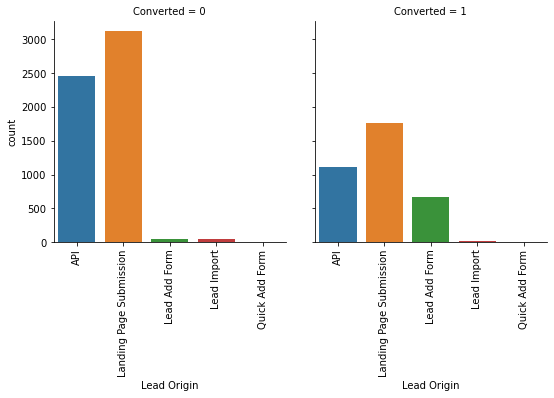

In [26]:
barchart('Lead Origin',4,1)

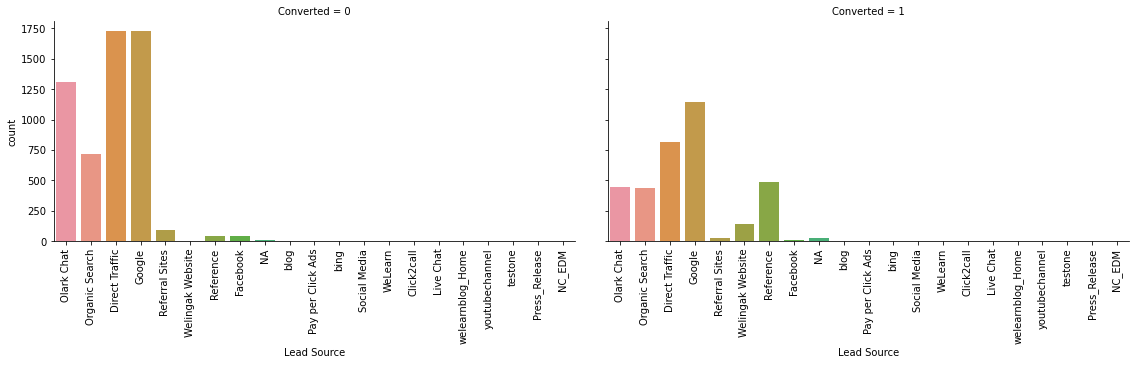

In [27]:
barchart('Lead Source',4,2)

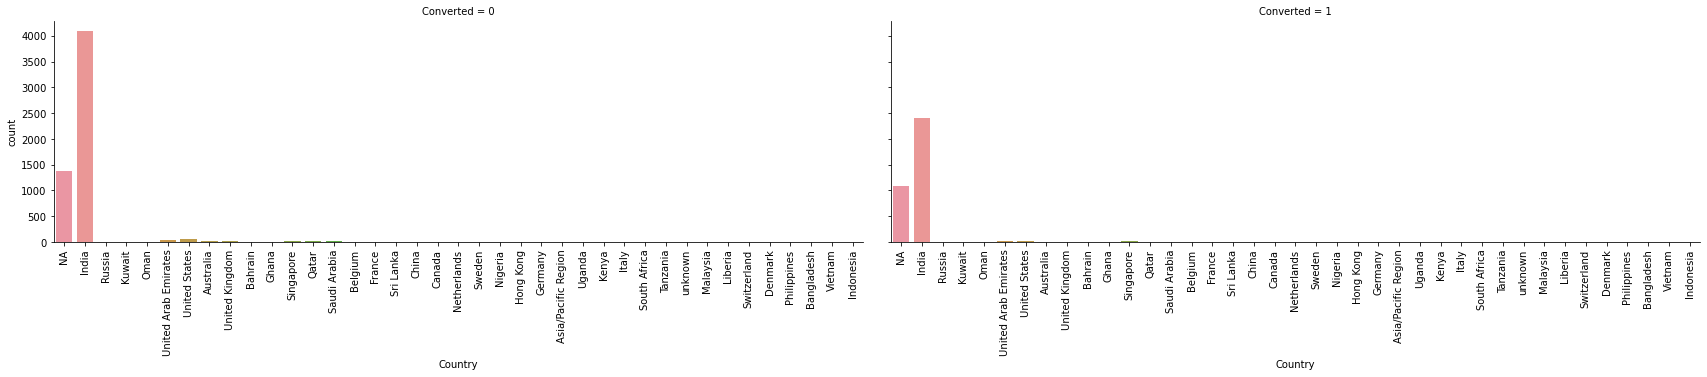

In [28]:
barchart('Country',4,3)

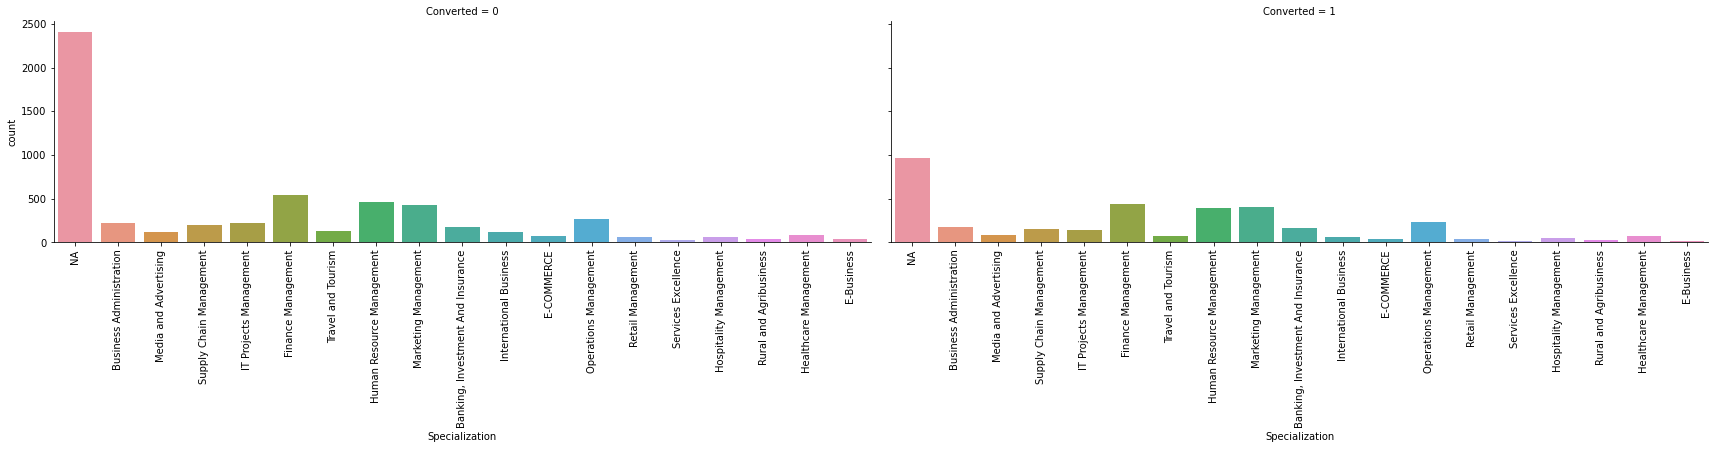

In [29]:
barchart('Specialization',4,3)

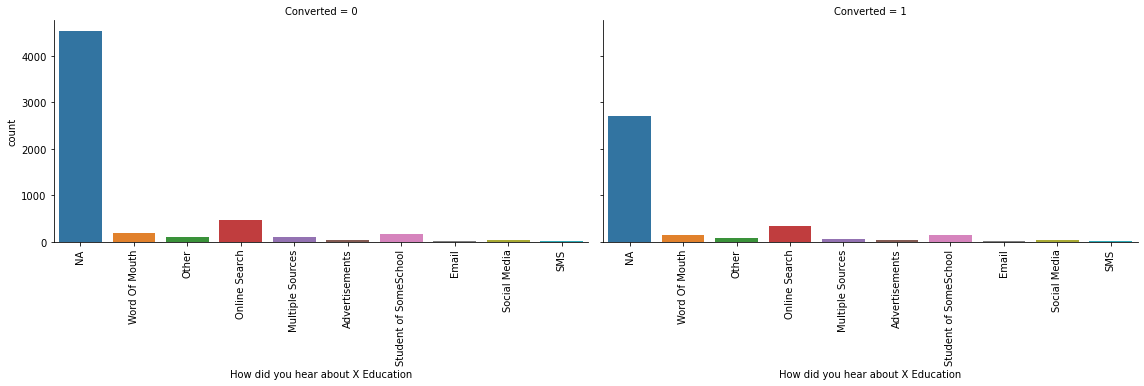

In [30]:
barchart('How did you hear about X Education',4,2)

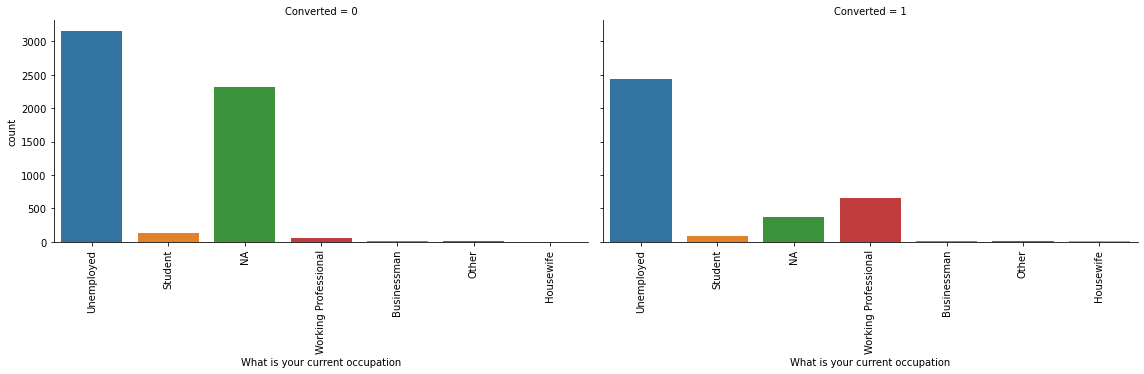

In [31]:
barchart('What is your current occupation',4,2)

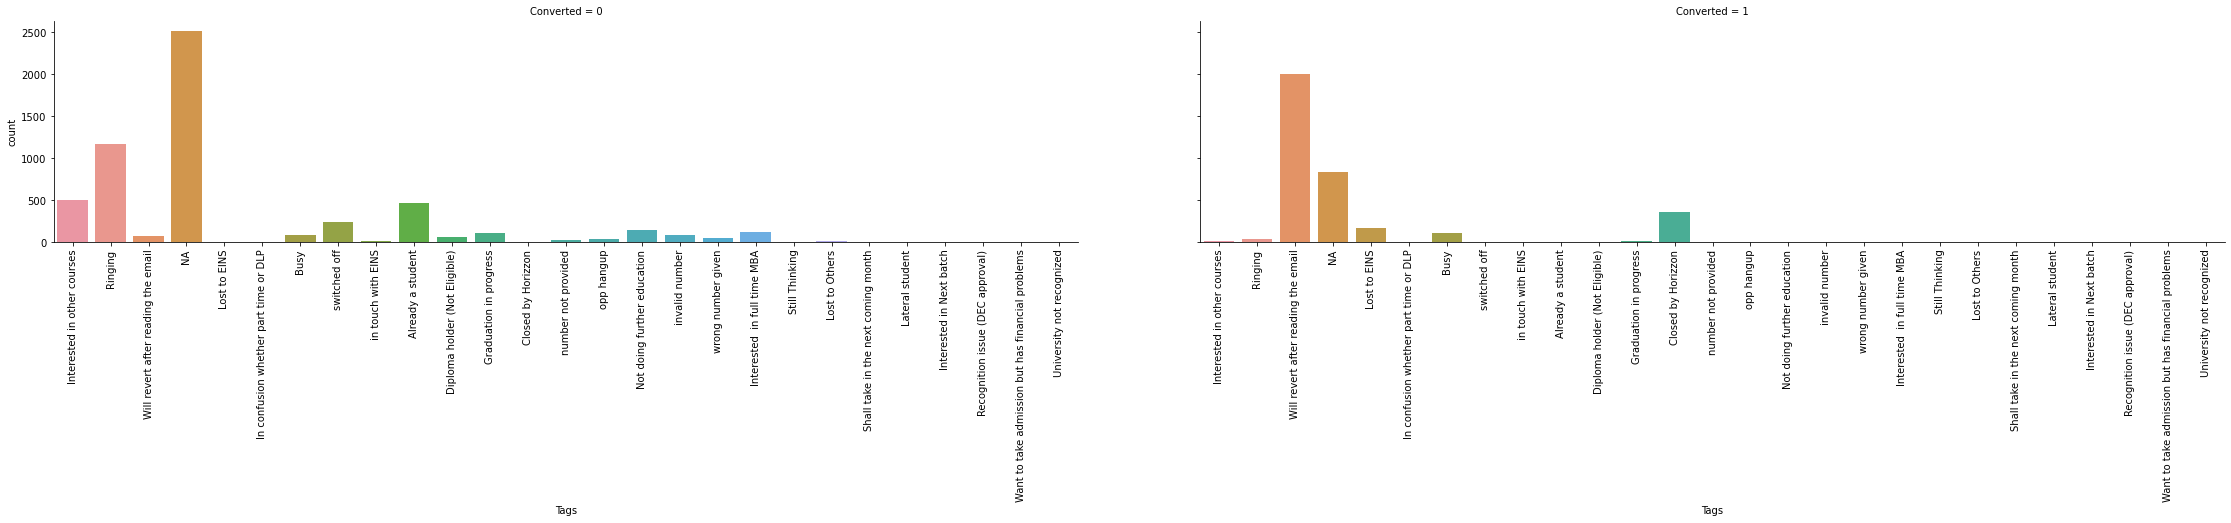

In [32]:
barchart('Tags',4,4)

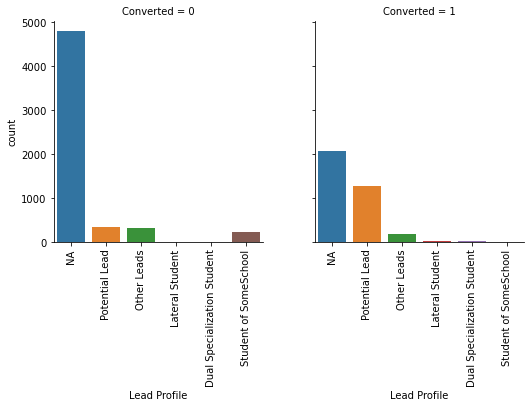

In [33]:
barchart('Lead Profile',4,1)

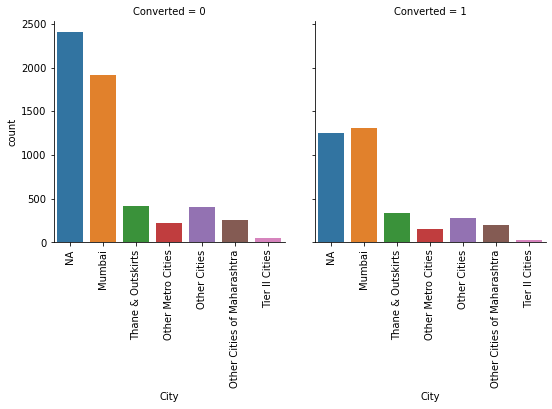

In [34]:
barchart('City',4,1)

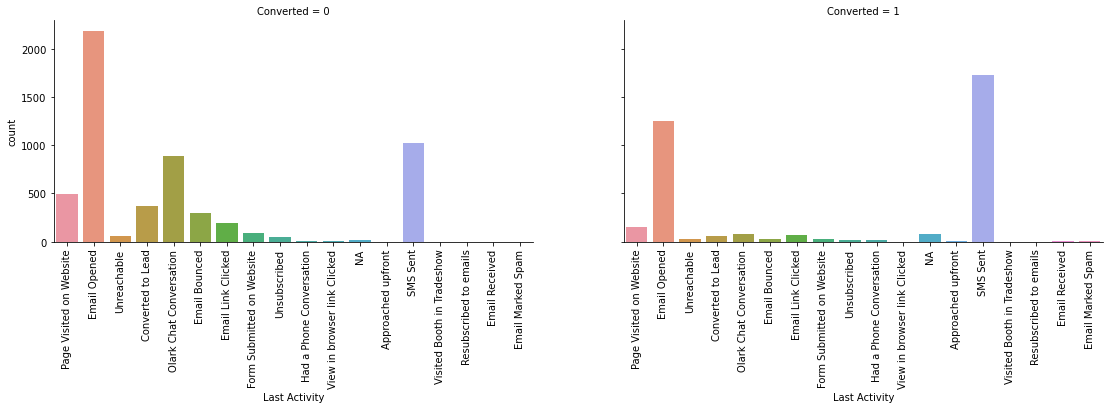

In [35]:
barchart('Last Activity',4,2)

In [36]:
## barchart for numerical against Converted

def barchart1(column):
    plt.figure(figsize = (8,4))
    plt.xticks(rotation = 90)
    sns.barplot(column,'Converted',data= leads_data)

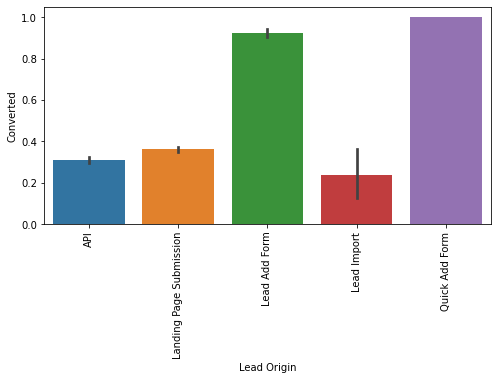

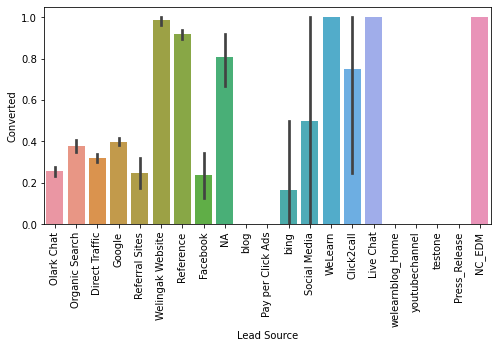

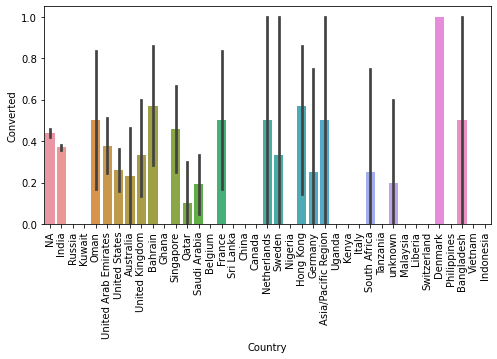

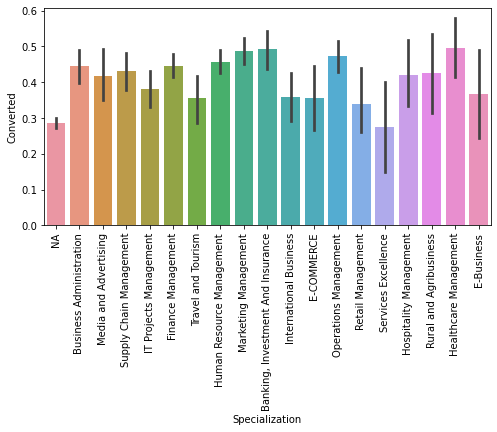

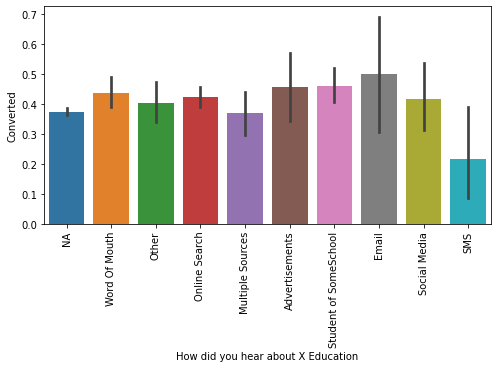

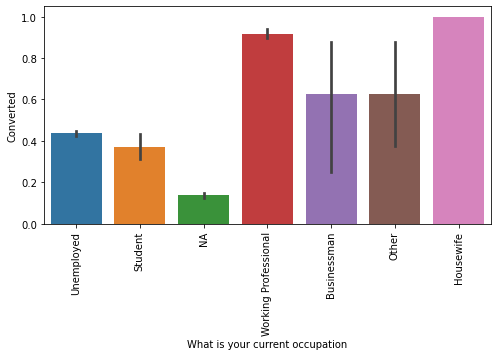

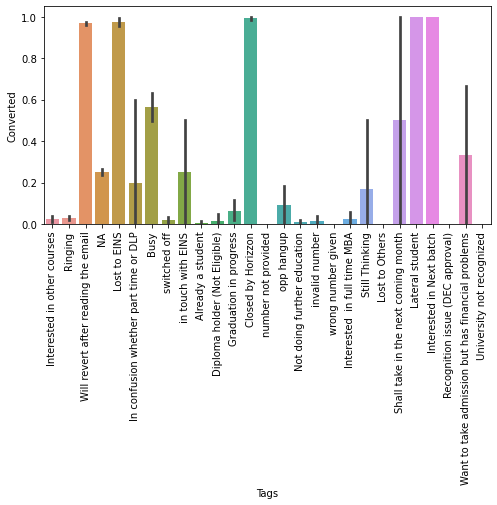

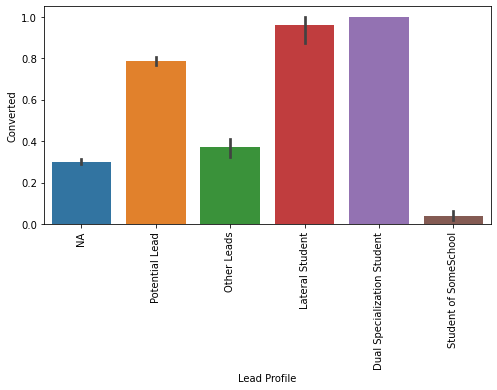

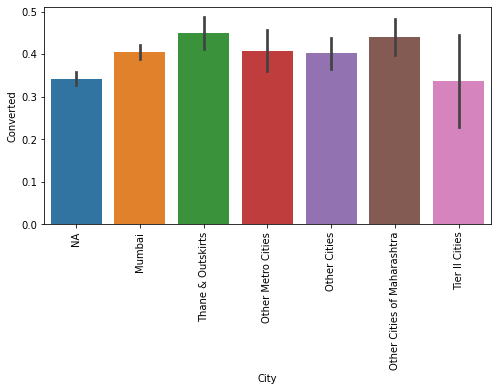

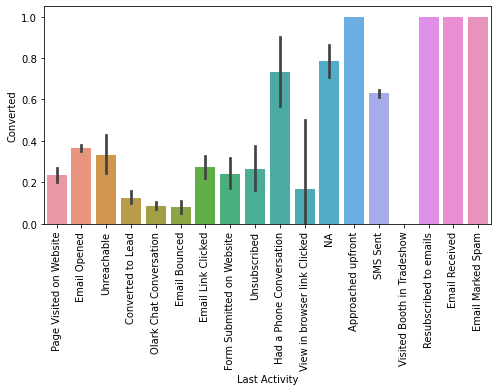

In [37]:
barchart1('Lead Origin')
barchart1('Lead Source')
barchart1('Country')
barchart1('Specialization')
barchart1('How did you hear about X Education')
barchart1('What is your current occupation')
barchart1('Tags')
barchart1('Lead Profile')
barchart1('City')
barchart1('Last Activity')

**As per barplots above following conclusion can be made**

1) Quick Add form and Lead Add form seems to be the most prominent leads origin for conversion  
2) Among Lead sources WeLearn, liveChat and Welingak website helped in max no of conversions  
3) Denmark shows the highest rate of conversion among other countries while qatar showed the least  
4) Healthcare management attracted highest no of conversions whereas Services excellence needs to be looked upon  
5) Emails showed the max conversion rate while sms were ignored  
6) Amazingly max conversions are from housewives and students seemed to be a hard nut to crack  
7) Thane and outskirts attracted the most no of conversions  

In [38]:
## Numerical - Numerical analysis 

num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

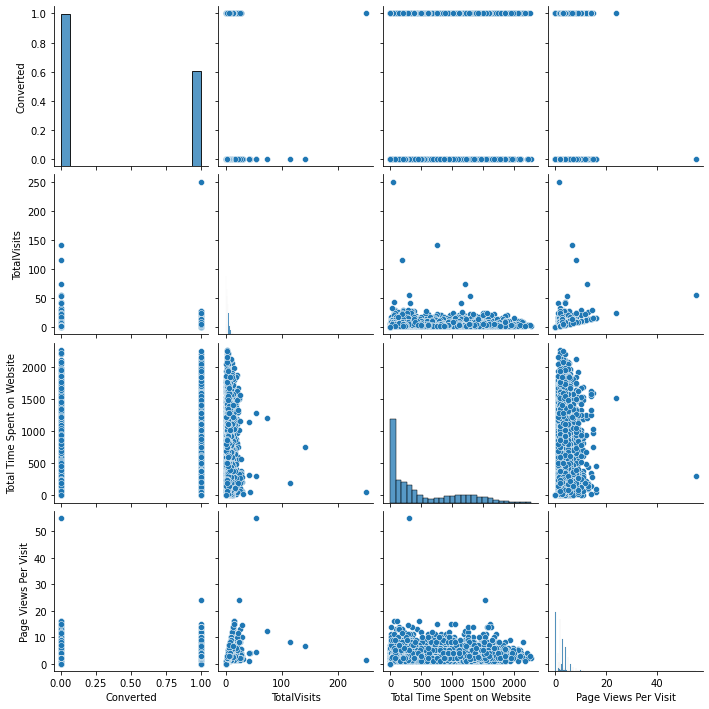

In [39]:
sns.pairplot(x_vars = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit'], y_vars = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit'], data = leads_data)
plt.show()

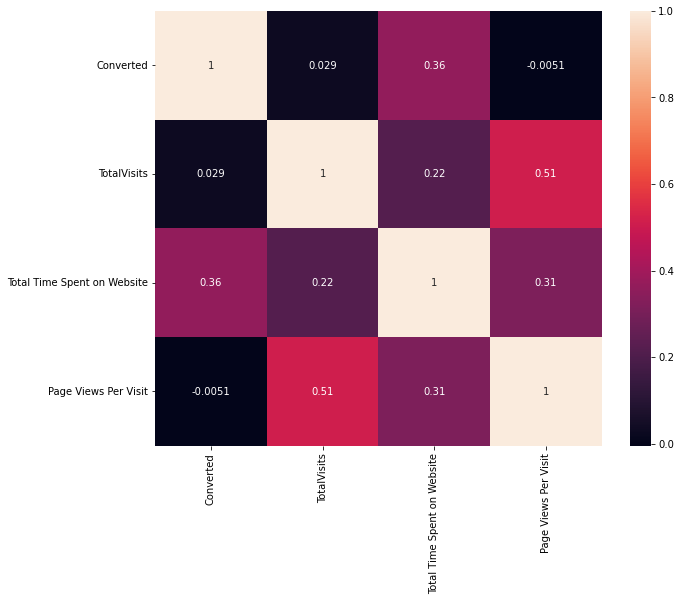

In [40]:
plt.figure(figsize = (10,8))
sns.heatmap(leads_data[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), annot = True)
plt.show()

As per paiplot and Heat map it shows that Total votes and Page views per visit shows max correlation

Total time spent on website has some correlation with the person getting converted



In [41]:
leads_data.shape


(9240, 30)

In [42]:
# cat_col

In [43]:
## Creating dummy variables for necessary categorical variables

dummy_vars = pd.get_dummies(leads_data[['Specialization','What is your current occupation','City','Lead Origin','Lead Source','Last Activity']], drop_first = True)

leads_data = pd.concat([leads_data, dummy_vars], axis = 1)

leads_data = leads_data.drop(['Specialization','What is your current occupation','City','Lead Origin','Lead Source','Last Activity'], axis = 1)

leads_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,How did you hear about X Education,What matters most to you in choosing a course,Search,...,Last Activity_Had a Phone Conversation,Last Activity_NA,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,No,No,0,0.0,0,0.0,NA,NA,Better Career Prospects,No,...,0,0,0,1,0,0,0,0,0,0
1,No,No,0,5.0,674,2.5,India,NA,Better Career Prospects,No,...,0,0,0,0,0,0,0,0,0,0
2,No,No,1,2.0,1532,2.0,India,NA,Better Career Prospects,No,...,0,0,0,0,0,0,0,0,0,0
3,No,No,0,1.0,305,1.0,India,Word Of Mouth,Better Career Prospects,No,...,0,0,0,0,0,0,1,0,0,0
4,No,No,1,2.0,1428,1.0,India,Other,Better Career Prospects,No,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Dropping the rest of the categorical columns for which we didn't created dummy variables
leads_data = leads_data.drop(['Country','How did you hear about X Education', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Receive More Updates About Our Courses','Tags', 'Update me on Supply Chain Content', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity','Do Not Email', 'Do Not Call'], axis=1)


In [45]:
# leads_data.info()

### Data Preparation for Modeling

#### Test-Train Split 

In [46]:
# Putting feature variable to X

X = leads_data.drop(['Converted'], axis=1)

# Putting response variable to y

y = leads_data['Converted']

In [47]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,...,Last Activity_Had a Phone Conversation,Last Activity_NA,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
# Printing the shape of the test and train data set

print(X_train.shape)
print(X_test.shape)

(6468, 74)
(2772, 74)


In [50]:
# Creating object of StandardScaler
scaler = StandardScaler()

# Applying scaler to numerical columns
num_col = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_col] = scaler.fit_transform(X_train[num_col])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,...,Last Activity_Had a Phone Conversation,Last Activity_NA,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
1871,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.100767,0.005716,-0.470569,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.290067,-0.691418,0.070401,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.290067,1.365219,1.226321,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3934,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Feature Scaling

#### Feature Selection Using RFE

In [51]:
# Shortlisting 15 features using RFE approach:

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [52]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False])

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Specialization_Business Administration', False, 40),
 ('Specialization_E-Business', False, 59),
 ('Specialization_E-COMMERCE', False, 28),
 ('Specialization_Finance Management', False, 34),
 ('Specialization_Healthcare Management', False, 32),
 ('Specialization_Hospitality Management', False, 6),
 ('Specialization_Human Resource Management', False, 50),
 ('Specialization_IT Projects Management', False, 33),
 ('Specialization_International Business', False, 21),
 ('Specialization_Marketing Management', False, 52),
 ('Specialization_Media and Advertising', False, 58),
 ('Specialization_NA', False, 5),
 ('Specialization_Operations Management', False, 47),
 ('Specialization_Retail Management', False, 16),
 ('Specialization_Rural and Agribusiness', False, 12),
 ('Specialization_Services Excellence', False, 49),
 ('Specialization_Supply Chain Management', False, 48),
 ('Specializa

In [54]:
# list of 15 features shortlisted by RFE:
col = X_train.columns[rfe.support_]
print(col)

Index(['Total Time Spent on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_NA',
       'What is your current occupation_Working Professional',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_NA', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent'],
      dtype='object')


### Model Building

#### Using statsmodel package for RFE shortlisted columns

#### Model 1

In [55]:
# Building model 1 using features shortlisted by RFE stored in the variable 'col' in the step above

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.1
Date:                Tue, 21 Mar 2023   Deviance:                       5408.3
Time:                        10:36:22   Pearson chi2:                 7.49e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3893
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6138      0.060    -10.233      0.000      -0.731      -0.496
Total Time Spent on Website                              0.9418      0.035     26.662      0.000       0.873       1.011
What is your current occupation_Housewife               22.6385   1.42e+04      0.002      0.999   -2.79e+04    2.79e+04
What is your current occupation_NA                      -1.1243      0.085    -13.212      0.000      -1.291      -0.957
What is your current occupation_Working Professional     2.5469      0.186     13.707      0.000       2.183       2.911
Lead Origin_Lead Add Form                                2.8553      0.198     14.456      0.000       2.468       3.242
Lead Source_Direct Traffic                              -0.7057      0.081     -8.660      0.000      -0.865      -0.546
Lead Source_Organic Search                              -0.4790      0.105     -4.574      0.000      -0.684      -0.274
Lead Source_Referral Sites                              -0.4814      0.306     -1.574      0.116      -1.081       0.118
Lead Source_Welingak Website                             1.9389      0.745      2.603      0.009       0.479       3.399
Last Activity_Converted to Lead                         -1.3000      0.216     -6.032      0.000      -1.722      -0.878
Last Activity_Email Bounced                             -1.8608      0.295     -6.305      0.000      -2.439      -1.282
Last Activity_Had a Phone Conversation                   1.8286      0.644      2.839      0.005       0.566       3.091
Last Activity_NA                                        -1.4482      0.419     -3.460      0.001      -2.268      -0.628
Last Activity_Olark Chat Conversation                   -0.9458      0.164     -5.781      0.000      -1.267      -0.625
Last Activity_SMS Sent                                   1.1104      0.074     15.090      0.000       0.966       1.255
========================================================================================================================
"""

In [56]:
# Creating a df to display features and their respective VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,1.59
14,Last Activity_SMS Sent,1.35
2,What is your current occupation_NA,1.32
5,Lead Source_Direct Traffic,1.26
8,Lead Source_Welingak Website,1.24
3,What is your current occupation_Working Profes...,1.17
13,Last Activity_Olark Chat Conversation,1.17
0,Total Time Spent on Website,1.15
12,Last Activity_NA,1.15
6,Lead Source_Organic Search,1.12


In [57]:
# Based on high p-value Dropping 'What is your current occupation_Housewife' feature:

col = col.drop('What is your current occupation_Housewife', 1)

#### Model 2

In [58]:
# Building model 2 after dropping 'What is your current occupation_Housewife' feature:

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.0
Date:                Tue, 21 Mar 2023   Deviance:                       5420.0
Time:                        10:36:23   Pearson chi2:                 7.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6067      0.060    -10.134      0.000      -0.724      -0.489
Total Time Spent on Website                              0.9417      0.035     26.673      0.000       0.872       1.011
What is your current occupation_NA                      -1.1284      0.085    -13.268      0.000      -1.295      -0.962
What is your current occupation_Working Professional     2.5412      0.186     13.675      0.000       2.177       2.905
Lead Origin_Lead Add Form                                2.8733      0.197     14.564      0.000       2.487       3.260
Lead Source_Direct Traffic                              -0.7057      0.081     -8.670      0.000      -0.865      -0.546
Lead Source_Organic Search                              -0.4741      0.105     -4.535      0.000      -0.679      -0.269
Lead Source_Referral Sites                              -0.4851      0.306     -1.586      0.113      -1.085       0.114
Lead Source_Welingak Website                             1.9133      0.745      2.569      0.010       0.453       3.373
Last Activity_Converted to Lead                         -1.3064      0.215     -6.064      0.000      -1.729      -0.884
Last Activity_Email Bounced                             -1.8699      0.295     -6.330      0.000      -2.449      -1.291
Last Activity_Had a Phone Conversation                   1.8211      0.644      2.827      0.005       0.559       3.084
Last Activity_NA                                        -1.4306      0.416     -3.439      0.001      -2.246      -0.615
Last Activity_Olark Chat Conversation                   -0.9520      0.164     -5.819      0.000      -1.273      -0.631
Last Activity_SMS Sent                                   1.1032      0.074     15.004      0.000       0.959       1.247
========================================================================================================================
"""

In [59]:
#  VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,1.58
13,Last Activity_SMS Sent,1.35
1,What is your current occupation_NA,1.32
4,Lead Source_Direct Traffic,1.26
7,Lead Source_Welingak Website,1.24
2,What is your current occupation_Working Profes...,1.17
12,Last Activity_Olark Chat Conversation,1.17
0,Total Time Spent on Website,1.15
11,Last Activity_NA,1.15
5,Lead Source_Organic Search,1.12


In [60]:
# Dropping 'Lead Source_Referral Sites' feature:

col = col.drop('Lead Source_Referral Sites', 1)

#### Model 3

In [61]:
# Building model 3 after dropping 'Lead Source_Referral Sites':

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm3.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.3
Date:                Tue, 21 Mar 2023   Deviance:                       5422.6
Time:                        10:36:23   Pearson chi2:                 7.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6203      0.059    -10.462      0.000      -0.737      -0.504
Total Time Spent on Website                              0.9403      0.035     26.655      0.000       0.871       1.009
What is your current occupation_NA                      -1.1298      0.085    -13.289      0.000      -1.296      -0.963
What is your current occupation_Working Professional     2.5401      0.186     13.664      0.000       2.176       2.904
Lead Origin_Lead Add Form                                2.8837      0.197     14.622      0.000       2.497       3.270
Lead Source_Direct Traffic                              -0.6935      0.081     -8.557      0.000      -0.852      -0.535
Lead Source_Organic Search                              -0.4620      0.104     -4.430      0.000      -0.666      -0.258
Lead Source_Welingak Website                             1.9126      0.745      2.568      0.010       0.453       3.372
Last Activity_Converted to Lead                         -1.3111      0.215     -6.085      0.000      -1.733      -0.889
Last Activity_Email Bounced                             -1.8682      0.295     -6.330      0.000      -2.447      -1.290
Last Activity_Had a Phone Conversation                   1.8186      0.646      2.815      0.005       0.553       3.085
Last Activity_NA                                        -1.4249      0.416     -3.424      0.001      -2.241      -0.609
Last Activity_Olark Chat Conversation                   -0.9543      0.164     -5.824      0.000      -1.275      -0.633
Last Activity_SMS Sent                                   1.1092      0.073     15.104      0.000       0.965       1.253
========================================================================================================================
"""

In [62]:
# VIFs:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,1.58
12,Last Activity_SMS Sent,1.35
1,What is your current occupation_NA,1.31
4,Lead Source_Direct Traffic,1.25
6,Lead Source_Welingak Website,1.24
2,What is your current occupation_Working Profes...,1.17
11,Last Activity_Olark Chat Conversation,1.17
0,Total Time Spent on Website,1.15
10,Last Activity_NA,1.15
5,Lead Source_Organic Search,1.12


#### VIF's for all features are within the prescribed limit of less than 5.0

In [63]:

# Dropping 'What is your current occupation_NA' feature as it the least prominent in business:

col = col.drop('What is your current occupation_NA', 1)

#### Model 4

In [64]:
# Building model 4 after dropping 'What is your current occupation_NA':

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm4.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2808.5
Date:                Tue, 21 Mar 2023   Deviance:                       5617.0
Time:                        10:36:23   Pearson chi2:                 8.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3693
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9509      0.054    -17.515      0.000      -1.057      -0.845
Total Time Spent on Website                              0.9584      0.035     27.717      0.000       0.891       1.026
What is your current occupation_Working Professional     2.8248      0.186     15.209      0.000       2.461       3.189
Lead Origin_Lead Add Form                                3.2043      0.196     16.323      0.000       2.820       3.589
Lead Source_Direct Traffic                              -0.6273      0.080     -7.875      0.000      -0.783      -0.471
Lead Source_Organic Search                              -0.4001      0.103     -3.889      0.000      -0.602      -0.198
Lead Source_Welingak Website                             1.9223      0.745      2.579      0.010       0.462       3.383
Last Activity_Converted to Lead                         -1.2981      0.214     -6.070      0.000      -1.717      -0.879
Last Activity_Email Bounced                             -1.8974      0.291     -6.511      0.000      -2.468      -1.326
Last Activity_Had a Phone Conversation                   1.9112      0.646      2.960      0.003       0.646       3.177
Last Activity_NA                                        -1.3811      0.427     -3.231      0.001      -2.219      -0.543
Last Activity_Olark Chat Conversation                   -1.1006      0.160     -6.883      0.000      -1.414      -0.787
Last Activity_SMS Sent                                   1.1300      0.072     15.673      0.000       0.989       1.271
========================================================================================================================
"""

In [65]:
# VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.58
11,Last Activity_SMS Sent,1.32
5,Lead Source_Welingak Website,1.24
3,Lead Source_Direct Traffic,1.21
1,What is your current occupation_Working Profes...,1.16
9,Last Activity_NA,1.15
0,Total Time Spent on Website,1.13
4,Lead Source_Organic Search,1.10
6,Last Activity_Converted to Lead,1.05
7,Last Activity_Email Bounced,1.05


In [66]:
# Dropping 'Last Activity_NA' feature:

col = col.drop('Last Activity_NA', 1)

#### Model 5 (Final Model)

In [67]:
# Building model 5 after dropping 'Last Activity_NA':

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model = logm5.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2813.2
Date:                Tue, 21 Mar 2023   Deviance:                       5626.5
Time:                        10:36:24   Pearson chi2:                 8.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3684
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9593      0.054    -17.710      0.000      -1.065      -0.853
Total Time Spent on Website                              0.9521      0.035     27.585      0.000       0.884       1.020
What is your current occupation_Working Professional     2.8253      0.186     15.219      0.000       2.461       3.189
Lead Origin_Lead Add Form                                3.0492      0.184     16.556      0.000       2.688       3.410
Lead Source_Direct Traffic                              -0.6216      0.080     -7.813      0.000      -0.778      -0.466
Lead Source_Organic Search                              -0.3950      0.103     -3.842      0.000      -0.596      -0.193
Lead Source_Welingak Website                             1.9236      0.746      2.580      0.010       0.462       3.385
Last Activity_Converted to Lead                         -1.2893      0.214     -6.035      0.000      -1.708      -0.871
Last Activity_Email Bounced                             -1.8632      0.288     -6.472      0.000      -2.427      -1.299
Last Activity_Had a Phone Conversation                   1.9195      0.644      2.979      0.003       0.656       3.183
Last Activity_Olark Chat Conversation                   -1.0928      0.160     -6.845      0.000      -1.406      -0.780
Last Activity_SMS Sent                                   1.1409      0.072     15.881      0.000       1.000       1.282
========================================================================================================================
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.41
10,Last Activity_SMS Sent,1.30
5,Lead Source_Welingak Website,1.24
3,Lead Source_Direct Traffic,1.21
1,What is your current occupation_Working Profes...,1.16
0,Total Time Spent on Website,1.11
4,Lead Source_Organic Search,1.10
6,Last Activity_Converted to Lead,1.05
7,Last Activity_Email Bounced,1.05
9,Last Activity_Olark Chat Conversation,1.05


#### Key Observations:

- The model now has 11 features, with both p-values and VIF scores within their respective thresholds.
- Considering Model 5 as our final model

#### Predicting based on Model 5

In [69]:
# Getting the Predicted values on the train set X_train

y_train_pred = model.predict(X_train_sm)
y_train_pred[:10]

1871    0.141580
6795    0.171438
3516    0.165541
8105    0.814777
3934    0.141580
4844    0.984615
3297    0.114143
8071    0.998622
987     0.158186
7423    0.887100
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14158041, 0.17143811, 0.16554051, 0.8147771 , 0.14158041,
       0.98461464, 0.11414269, 0.99862205, 0.15818626, 0.88710011])

In [71]:
# Creating a dataframe with the actual Converted value and the Predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect
0,0,0.141580,1871
1,0,0.171438,6795
2,0,0.165541,3516
3,0,0.814777,8105
4,0,0.141580,3934


In [72]:
# Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final["Convert_Prob"].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Prospect,Predicted
0,0,0.141580,1871,0
1,0,0.171438,6795,0
2,0,0.165541,3516,0
3,0,0.814777,8105,1
4,0,0.141580,3934,0


#### Model Evaluation

#### Create confusion matrix

In [73]:
# Creating the confusion matrix for model evaluation:

conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

# Defining a function to pull model evaluation stats:

def evaluation_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)

    print ("Model Accuracy                       : ", round(accuracy*100,1),"%")
    print ("Model Sensitivity                    : ", round(sensitivity*100,1),"%")
    print ("Model Specificity                    : ", round(specificity*100,1),"%")
    print ("Model Precision                      : ", round(precision*100,1),"%")

In [74]:
# Plotting the confusion matrix: 

def conf_matrix_plot(cm):
    plt.figure(figsize=(5,4))
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Reds')
    ax.set_xlabel('Predicted Values',size=12)
    ax.set_ylabel('Actual Values',size=12)
    ax.set_title('Confusion Matrix', size=14,fontweight = 600)
    return plt.show()

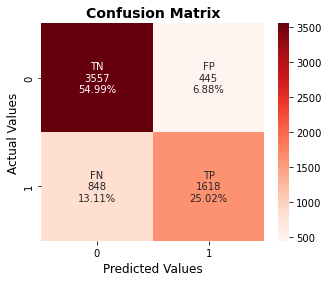

In [75]:
# Creating a confusion matrix using the defined function: 

conf_matrix_plot(conf_matrix)

In [76]:
# Evaluating the model using custom function defined above:

evaluation_metrics (conf_matrix)

Model Accuracy                       :  80.0 %
Model Sensitivity                    :  65.6 %
Model Specificity                    :  88.9 %
Model Precision                      :  78.4 %


#### Find Optimal cutoff value

- Sesitivity is not upto mark
- Others are fine
- Creating columns with different probability cutoffs: 

In [77]:
# Creating columns with different probability cutoffs: 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Convert_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.141580,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.171438,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.165541,3516,0,1,1,0,0,0,0,0,0,0,0
3,0,0.814777,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.141580,3934,0,1,1,0,0,0,0,0,0,0,0


#### Plot accuracy sensitivity and specificity

In [78]:
# Calculating accuracy sensitivity etc for various probability cutoffs:

cutoff_dataframe = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity','precision','recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final[i])
    cutoff_dataframe.loc[i] =[ i ,accuracy,sensitivity,specificity, precision[1], recall[1]]
cutoff_dataframe

,probability,accuracy,sensitivity,specificity,precision,recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.550866,0.977291,0.288106,0.458262,0.977291
0.2,0.2,0.730056,0.894972,0.628436,0.597455,0.894972
0.3,0.3,0.785714,0.844282,0.749625,0.675097,0.844282
0.4,0.4,0.797619,0.725061,0.842329,0.739148,0.725061
0.5,0.5,0.800093,0.656123,0.888806,0.784295,0.656123
0.6,0.6,0.792672,0.583942,0.921289,0.820513,0.583942
0.7,0.7,0.776129,0.497161,0.948026,0.854951,0.497161
0.8,0.8,0.741960,0.362936,0.975512,0.901309,0.362936
0.9,0.9,0.710111,0.256691,0.989505,0.937778,0.256691


<Figure size 720x720 with 0 Axes>

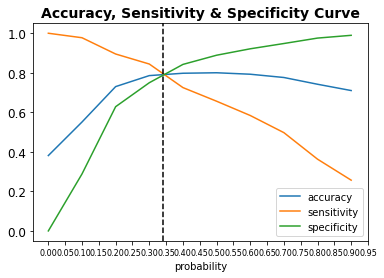

In [79]:
# Plotting the 'accuracy','sensitivity','specificity' chart: 

plt.figure(figsize=(10,10))
ax= cutoff_dataframe.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
ax.axvline(x=0.34, color='black', linestyle='--')
ax.set_title('Accuracy, Sensitivity & Specificity Curve', size=14,fontweight = 600)
plt.yticks(size=12)
plt.show()

In [80]:
# Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.35 else 0

y_train_pred_final['Predicted'] = y_train_pred_final['Convert_Prob'].map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect,Predicted
0,0,0.141580,1871,0
1,0,0.171438,6795,0
2,0,0.165541,3516,0
3,0,0.814777,8105,1
4,0,0.141580,3934,0


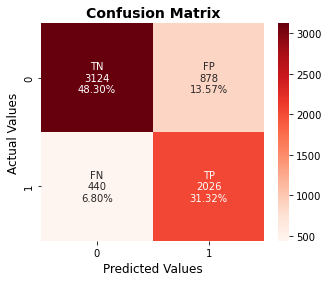

In [81]:
# Plotting the confusion matrix:

conf_matrix = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
conf_matrix_plot(conf_matrix)

In [82]:
# Evaluating the model using custom function defined above:

evaluation_metrics (conf_matrix)

Model Accuracy                       :  79.6 %
Model Sensitivity                    :  82.2 %
Model Specificity                    :  78.1 %
Model Precision                      :  69.8 %


- Sesitivity and everything is upto the mark
- Plotting ROC curve

#### Plot ROC Curve

In [83]:
# Defining the function to plot the ROC curve on our Model:

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve',size=14, fontweight = 600)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], 
                                         y_train_pred_final["Convert_Prob"], 
                                         drop_intermediate = False )

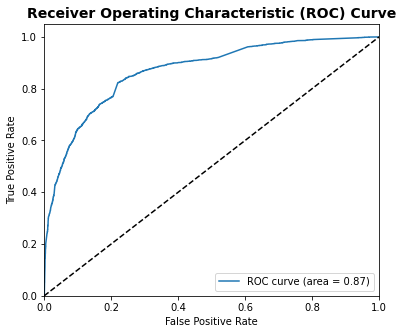

In [85]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Convert_Prob"])

In [86]:
# Creating new column 'Predicted_PRT' with value 1 if Lead_Score_Prob > 0.41 else 0

y_train_pred_final['Predicted_PRT'] = y_train_pred_final['Convert_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Prospect,Predicted,Predicted_PRT
0,0,0.141580,1871,0,0
1,0,0.171438,6795,0,0
2,0,0.165541,3516,0,0
3,0,0.814777,8105,1,1
4,0,0.141580,3934,0,0


In [87]:
conf_matrix_PRT = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted_PRT'])

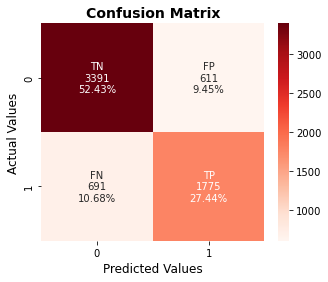

In [88]:
conf_matrix_plot(conf_matrix_PRT)

In [89]:
# Data based on cutoff received from Precision-Recall Trade off

evaluation_metrics (conf_matrix_PRT)

Model Accuracy                       :  79.9 %
Model Sensitivity                    :  72.0 %
Model Specificity                    :  84.7 %
Model Precision                      :  74.4 %


#### Making prediction on test set

In [90]:
# Making predictions on the test set: 

# Scaling the test dataset :

num_col = X_train.select_dtypes(include=['float64', 'int64']).columns

X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,...,Last Activity_Had a Phone Conversation,Last Activity_NA,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
4269,0.857967,0.964504,2.613424,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2376,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7766,0.290067,-0.777416,1.226321,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9199,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# Filtering the X_test to reflect features from our final model:

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Working Professional,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
4269,0.964504,0,0,1,0,0,0,0,0,0,1
2376,-0.885371,0,1,0,0,0,0,0,0,0,1
7766,-0.777416,1,0,0,0,0,0,0,0,0,0
9199,-0.885371,0,0,0,0,0,0,0,0,1,0
4359,-0.885371,0,1,0,0,0,0,0,0,0,0


In [92]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Total Time Spent on Website',
       'What is your current occupation_Working Professional',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent'],
      dtype='object')

#### Merging train and test predictions

In [93]:
# Predicting the final test model 

y_test_pred = model.predict(X_test_sm)

In [94]:
y_test_pred[:10]

4269    0.617329
2376    0.915896
7766    0.755066
9199    0.052402
4359    0.776777
9186    0.599833
1631    0.490618
8963    0.208275
8007    0.076400
5324    0.405491
dtype: float64

In [95]:
# Converting y_pred to a dataframe

y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.617329
2376,0.915896
7766,0.755066
9199,0.052402
4359,0.776777


In [96]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [97]:
# Moving CustID to index

y_test_df['Prospect'] = y_test_df.index

# Removing index for both dataframes so that we can append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1 by concat()

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect,0
0,1,4269,0.617329
1,1,2376,0.915896
2,1,7766,0.755066
3,0,9199,0.052402
4,1,4359,0.776777


In [98]:
# Renaming the column of y_pred_final

y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect','Converted','Convert_Prob'], axis=1)
y_pred_final.head()

,Prospect,Converted,Convert_Prob
0,4269,1,0.617329
1,2376,1,0.915896
2,7766,1,0.755066
3,9199,0,0.052402
4,4359,1,0.776777


In [99]:
# Creating new column 'Final_Predicted' with value 1 if Lead_Score_Prob > 0.35 else 0

y_pred_final['Final_Predicted'] = y_pred_final["Convert_Prob"].map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect,Converted,Convert_Prob,Final_Predicted
0,4269,1,0.617329,1
1,2376,1,0.915896,1
2,7766,1,0.755066,1
3,9199,0,0.052402,0
4,4359,1,0.776777,1


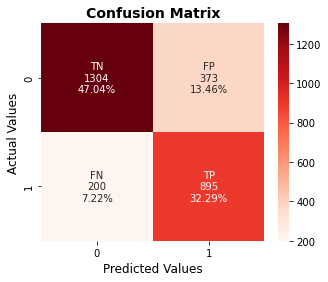

In [100]:
conf_matrix_final = confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_Predicted'])
conf_matrix_plot(conf_matrix_final)

In [101]:
evaluation_metrics (conf_matrix_final)

Model Accuracy                       :  79.3 %
Model Sensitivity                    :  81.7 %
Model Specificity                    :  77.8 %
Model Precision                      :  70.6 %


Train data performance:- 
 Model Accuracy                       :  79.6 %
 Model Sensitivity                    :  82.2 %
 Model Specificity                    :  78.1 %
 Model Precision                      :  69.8 %

- We got 1% difference on train and test data's performance metrics, showing that our final model **didn't overfit training** data and is performing well as of now.
- High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted.

#### Assigning Lead score

In [102]:
y_pred_final['Lead_Score']=(y_pred_final['Convert_Prob']*100).astype("int64")
y_pred_final = y_pred_final.sort_values(by='Convert_Prob',ascending=False)

y_pred_final.head()

,Prospect,Converted,Convert_Prob,Final_Predicted,Lead_Score
546,3478,1,0.999099,1,99
745,6383,1,0.999056,1,99
1091,818,1,0.998896,1,99
2405,5921,1,0.998476,1,99
931,8054,0,0.997987,1,99


### Conclusions of the Assignment
The Topmost features that contribute to decision

- Lead Origin - Lead Add Form
- Lead Source - Welingak Website, Direct Traffic, Organic Search
- What is your current occupation - Working Profes
- Last Activity - SMS Sent, Converted to Lead, Email Bounced, Olark Chat Conversation, Had a Phone Conversation
- Total Time Spent on Website